<a href="https://colab.research.google.com/github/kl938/sysen5160/blob/main/SYSEN5160_hw3_kl938.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4 - Product Development/Optimization Process

I developed this homework to expose you to an simplified version of the product development/optimizations process. Please skim through `Deb2000.pdf` on Canvas before starting this exercise. 

_Note: I am aware that some exercises can be done much more efficient via vectorization. I understand that the concept of vectorization can be challenging to apply while you try to understand the prompts.  
To make the HW accessible to everyone, many implementations are suggested via loops.     
Students that are further ahead in their CS education may feel free to implement everything via vectorized approaches if they find this more to their liking.  
(We will give extra credit where extra effort is made)_

In [100]:
#from IPython.display import Image
#display(Image(filename =  "./GeneralProblem.png"))
#!pip install pyDOE

In [101]:
# Import libraries

from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

Please implement the following equations in Python

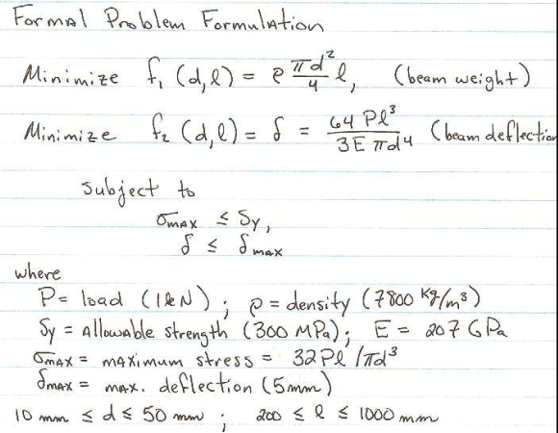

In [ ]:
from IPython.display import Image
display(Image(filename =  "./ProblemFormulation.png"))

In [104]:
import numpy as np
import scipy.optimize
from scipy.optimize import minimize
import math

# Formal Problem Definition


#################
# Your Code Starts Here
#################

P = 1; # load in kN
rho = 7800; # density in kg/m^3
sigma_y = 300*10**3; # allowable strength in Pa
E = 207*10**6; # constant in Pa

#if 0.01 < d < 0.05 and 0.2 < l < 1
sigma_max = (32*P*l)/(math.pi*d**3);
delta_max = 0.005; # max deflection in mm

def f1(d,l):
  s_max = (32*P*l)/(math.pi*d*3);
  f1 = rho*(math.pi*d**2)/4*l;
  return f1

def f2(d,l):
  f2 = (64*P*l**3)/(3*E*math.pi*d**4);
  return f2

def f3(d,l):
  s_max = (32*P*l)/(math.pi*d*3);
  f3 = s_max;
  return f3

print(s_max) #for some reason, the s_m/f3 value is correct here, but when running it in the next block of code, it's different...

#################
# Your Code Ends Here
#################

381971.86342054873


Convince yourself that your implementation is correct by plugging in assumptions and checking the units. For example, when plugging in a l of 0.3 m and a d of 0.02 m f1, f2, and f3 should yield the following:

f1: 0.73513 

f2: 0.00554 

f3: 38197

In [103]:
d = 0.02 # from 10 to 50 mm
l = 0.3 # from 200 to 1000 mm

f1_r = f1(d,l)
f2_r = f2(d,l)
s_m = f3(d,l)

print(f1_r,f2_r, s_m)

0.7351326809400115 0.0055358241075441844 50.929581789406505


# Remapping to upper and lower bounds

Now we'd like to create samples for our equations. We want to sample from a uniform distribution but with the corresponding upper and lower bounds.
- Use the Latin Hypercube Sampling method `lhs` via `from pyDOE import *` and create a 2-dimensional sample based on your `n_samples`. Use the `criterion='center'` as additional input
- Implement a function called `remap(inputVal, fromMin, fromMax, toMin, toMax)` that takes an input value and remaps your input linearly to a new 'domain', given `min` and `max` for before and after. That function should return the mapped value

Now use the given lines to create samples for deflection and length. Let's display the array and plots some histograms

array([0.01574667, 0.01785333, 0.0162    , ..., 0.03369333, 0.03921333,
       0.04356   ])

array([0.49253333, 0.41573333, 0.3384    , ..., 0.60293333, 0.80453333,
       0.56826667])

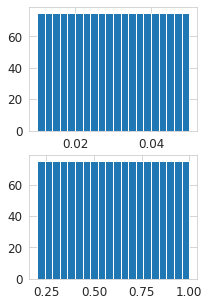

In [88]:
from pyDOE import *
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import uniform

n_samples = 1500 # number of samples 


sample = lhs(2, samples=n_samples, criterion='center')

# Define remap function

#################
# Your Code Starts Here
#################

def remap(inputVal, fromMin, fromMax, toMin, toMax):
  remap = (toMax - toMin)*(inputVal - fromMin) / (fromMax - fromMin) + toMin;
  return remap

#################
# Your Code Ends Here
#################

# remap values according to problem definition

samples_d = pd.DataFrame(sample[:,0]).apply(lambda row: remap(row,0,1, 10e-3, 50e-3 ), axis=1).values.flatten()
samples_l = pd.DataFrame(sample[:,1]).apply(lambda row: remap(row,0,1,200e-3, 1000e-3 ), axis=1).values.flatten()

display(samples_d, samples_l)





f, axs = plt.subplots(2,figsize=(3,5))  
axs[0].hist(samples_d, bins=20)
axs[1].hist(samples_l, bins=20)
plt.show()



# Calculate the Objective Function 



1. Create lists for deflection, diameter, length, weight, and stress, denote them with the prefix `res_`. (You'll see why we use lists in a minute)
2. Loop over all samples and calculate ``weight``, ``delta``, ``sigma_max``, ``res_delta``, ``res_length``, ``res_diam``, ``res_weight``, ``res_sigma``
3. If the result passes all constraints in terms of `delta_max` and `sigma_max`, add them to your lists.
4. Concatenate all lists to a Dataframe that holds all your results.

In [89]:
res_delta = []
res_diam = []
res_length = []
res_weight = []
res_sigma = []
for i in range(n_samples): 
    
    weight = f1(samples_d[i],samples_l[i] ) # weight
    delta = f2(samples_d[i],samples_l[i] ) # deflection
    sigma_max = f3( samples_d[i],samples_l[i]) # stress

    # add arch if constraints are met
    
    if sigma_max <= sigma_y and delta <= delta_max:
        #print(samples_d[i],samples_l[i] )
        res_delta.append(delta)
        res_length.append(samples_l[i])
        res_diam.append(samples_d[i])
        res_weight.append(weight)
        res_sigma.append(sigma_max)
        



import pandas as pd



df =pd.DataFrame(
    {'res_delta': res_delta,
     'res_diam': res_diam,
     'res_length': res_length,
     'res_weight': res_weight,
     'res_sigma': res_sigma,
     #'pareto': pareto
    })

display(df)

,res_delta,res_diam,res_length,res_weight,res_sigma
0,0.003083,0.023213,0.301067,0.993853,44.035610
1,0.002980,0.038413,0.582667,5.267065,51.501162
2,0.004287,0.033987,0.558667,3.953251,55.811416
3,0.000770,0.035213,0.330400,2.509798,31.857504
4,0.003955,0.044360,0.775733,9.351473,59.374473
...,...,...,...,...,...
604,0.002716,0.046013,0.718667,9.321362,53.030126
605,0.000216,0.048813,0.334133,4.877320,23.241288
606,0.000637,0.043347,0.409333,4.711650,32.062712
607,0.000299,0.041533,0.300533,3.175928,24.568278


Plot your arrays in 2D and convince yourself that your outputs match the visual in the cell below

In [80]:
from IPython.display import Image
display(Image(filename =  "./Decision-to-ObjectiveSpace.png"))

FileNotFoundError: ignored

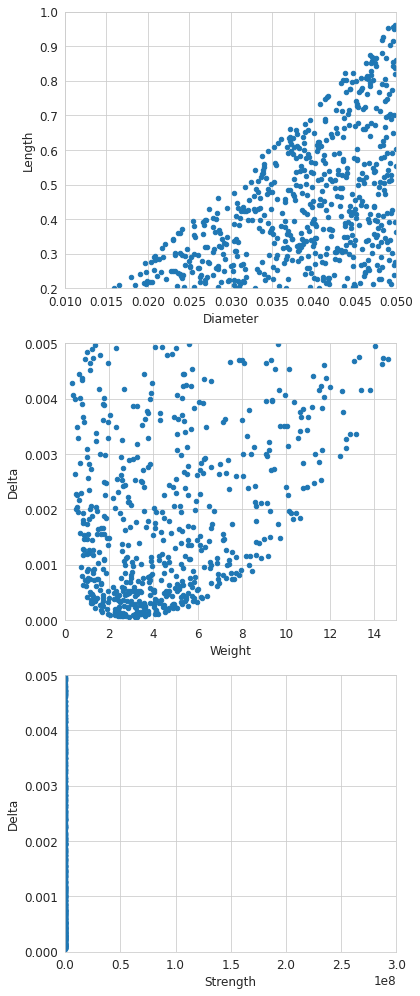

In [90]:
# Plot in 2D
f, axs = plt.subplots(3,figsize=(6,14)) 
        
axs[0].scatter(res_diam, res_length, s=20)
axs[0].set_xlim([10e-3, 50e-3])
axs[0].set_ylim([200e-3, 1000e-3])
axs[0].set_xlabel("Diameter")
axs[0].set_ylabel("Length")


axs[1].scatter(res_weight, res_delta, s=20)
axs[1].set_xlim([0, 15])
axs[1].set_ylim([0, 5e-3])
axs[1].set_xlabel("Weight")
axs[1].set_ylabel("Delta")


axs[2].scatter(res_sigma, res_delta, s=20)
axs[2].set_xlim([0, 300e6])
axs[2].set_ylim([0, 5e-3])
axs[2].set_xlabel("Strength")
axs[2].set_ylabel("Delta")

#
plt.tight_layout() 
plt.show()

We can create an interactive 3D plot via matplotlib including `Weight`, `Delta`, and `Sigma`, see https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

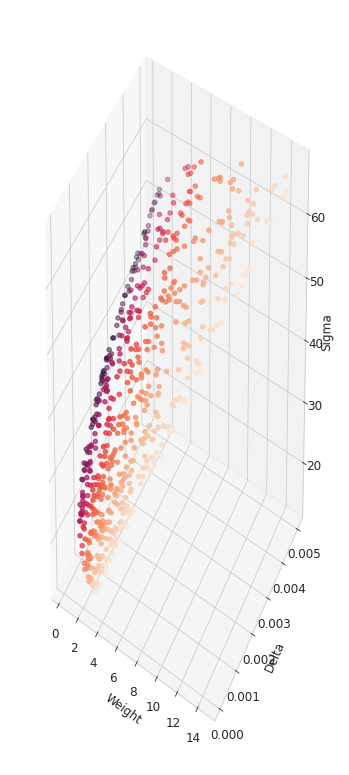

In [91]:
# ! pip install pywidget
#
#  Plot in 3D

from mpl_toolkits.mplot3d import Axes3D
#%%
import matplotlib.pyplot as plt
import numpy as np



#%matplotlib notebook
#%matplotlib widget
#%matplotlib ipympl

fig = plt.figure(figsize=(6,14))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(res_weight, res_delta, res_sigma, c=res_diam)
ax.set_xlabel("Weight")
ax.set_ylabel("Delta")
ax.set_zlabel("Sigma")

plt.show()




# Pareto search

Please implement a Pareto sorting algorithm and find the Pareto front (non-dominated architectures). 

_Note: I am aware that solutions can be found on the web that make very efficient use of numpy and pandas.  
We will give extra credit for everyone implementing the naive algorithm in a loop from scratch (please provide comments for your code)._

Follow those steps:
1. Create empty list that hold dominated IDs
2. Loop over all samples and check if architecture lies on the Pareto front. 
3. Append the IDs accordingly
4. When done looping, you can use a combination of `set()` and `some_list.difference()` to work out the intersection between the lists your are interested in

Lastly, please print out the dominated and non-dominated architectures.

In [96]:
i = 0
dominated_ids = []

n_samples = len(res_delta)

# Search for dominated design

#################
# Your Code Starts Here
#################

all_ids = set(list(range(n_samples)))
dominated_ids = all_ids;

#################
# Your Code Ends Here
#################

all_ids = set(list(range(n_samples)))
non_dominated_ids = all_ids.difference(dominated_ids)

####

print("Dominated designs: " + str(dominated_ids))
print("Non-dominated designs: " + str(non_dominated_ids))
print("Number of non-dominating designs: " + str(n_samples - (len(dominated_ids))))

Dominated designs: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

# Filtering and Plotting

We are almost done. Let's plot all architectures in one plot and highlight the Pareto front.  
What's left is using the IDs to filter the initial lists for non-dominated architectures so we can plot them.

- Use a Python _list comprehension_ or the _bit mask_ to fill 6 arrays 


``res_weight_dominated ``  
``res_delta_dominated ``  
``res_sigma_dominated``  
``res_weight_nondominated``  
``res_delta_nondominated ``  
``res_sigma_nondominated ``


 from the list `dominated_ids`

 _Note: Expert Pandas users can do filtering via a bitmask_


The list comprehension way would go as follows:

1. Create new list to hold flags for non-dominated architectures
2. Loop through all samples
3. Check if architecture `i` is non-dominated, append a flag `1` to list
4. Set the column 'non-dominated' in your architecture Dataframe to the list you just created
5. Convince yourself everything looks right via `display(df)`.


In [97]:
index_arr = np.array(list(non_dominated_ids))

mask_arr = np.zeros(n_samples, dtype=int)

mask_arr[index_arr] = 1
display(mask_arr)


df['non-dominated'] = mask_arr

res_weight_dominated = df['res_weight'].loc[df['non-dominated'] == 0]

#################
# Not Implemented
#################


# ################
# Not Implemented
# ################

display(df)

IndexError: ignored

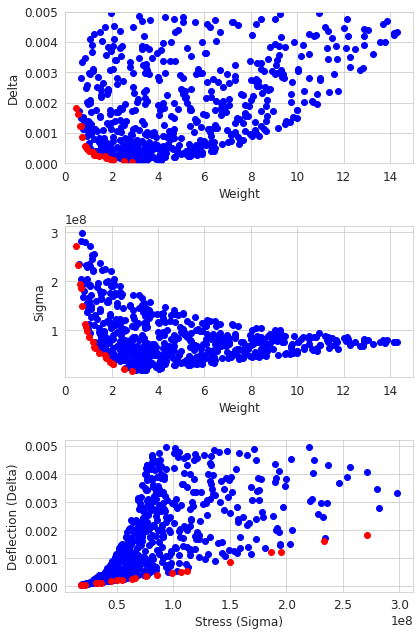

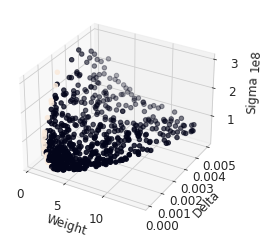

In [ ]:
# Plot in 2D
f, axs = plt.subplots(3,figsize=(6,9)) 


axs[0].scatter(res_weight_dominated, res_delta_dominated, c='b')
axs[0].scatter(res_weight_nondominated, res_delta_nondominated, c='r',marker="o")
axs[0].set_xlim([0, 15])
axs[0].set_ylim([0, 5e-3])
axs[0].set_xlabel("Weight")
axs[0].set_ylabel("Delta")


axs[1].scatter(res_weight_dominated, res_sigma_dominated, c='b')
axs[1].scatter(res_weight_nondominated, res_sigma_nondominated, c='r',marker="o")
axs[1].set_xlim([0, 15])
#axs[1].set_ylim([0, 5e-3])
axs[1].set_xlabel("Weight")
axs[1].set_ylabel("Sigma")




axs[2].scatter( res_sigma_dominated,res_delta_dominated, c='b')
axs[2].scatter(res_sigma_nondominated,res_delta_nondominated,  c='r',marker="o")
axs[2].set_xlabel("Stress (Sigma)")
axs[2].set_ylabel("Deflection (Delta)")


#
plt.tight_layout() 
plt.show()



# Plot the annotated Dataframe in 3D and be proud of your work!

from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(df['res_weight'], df['res_delta'], df['res_sigma'], c=df['non-dominated'])
ax.set_xlabel("Weight")
ax.set_ylabel("Delta")
ax.set_zlabel("Sigma")

plt.show()

## (Extra Credit Bonus Challenge for Experts)
1. Find fuzzy Pareto front (2nd, 3rd order) and plot them in different colors
2. Derive a subset of the Pareto front based on a crowding distance estimate

# Conclusion

You are the lead production engineer for your company. You are instructed to finalize one design. After finding those ~25 non-dominated designs on the Pareto front, how would you proceed from here? Please describe in 200 words.

In [ ]:
from numpy.random.mtrand import beta
# Type up your answer here

# Well, for one, I did not come up with a solution for the pareto dominant part of the homework. I tried to Google,
# but did not find anything helpful that I could understand. I understand that the dominant designs are to be removed
# from consideration. If I were able to incorprate pairwise comaprisons on Python/Jupyter, I would implement that.

# With the ~25 (I'm guessing that's what I should have gotten if that part of the code was done correctly)
# non-dominated (Pareto Optimal) designs, I as the lead production engineer would proceed with analysis of those 25 designs.
# Since these non-dominated designs are all signficantly different from each other, there would need to be deep analysis,
# or stakeholder feedback on which design to actually go with. This analysis would come in the form of tradeoff analysis.
# The tradeoff analysis, like in the pictures from the lecture with the different beams, and point E all of on its own would be
# for d and l. 